Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuaion using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribution (excluding stopwords).

In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')

paragraph = """
After the Taliban took over Afghanistan in 2021, life became very difficult for women and girls. The Taliban have made many strict rules that take away women's freedom and rights. Most girls above 12 years old cannot go to school anymore. Women are not allowed to go to university either. This means many girls are growing up without education and cannot become doctors, teachers or leaders in the future.
Women have lost most of their jobs. Female doctors, teachers, government workers and businesswomen were told to stay home. Only a few women can still work as nurses or in some health jobs. Many families are suffering because women used to earn money for their households.
The Taliban force women to wear full body coverings and cover their faces in public. Women cannot travel anywhere without a male family member like a father, brother or husband. They cannot go to parks, gyms or beauty salons anymore. Even simple things like going to the market have become difficult.
Women who protest against these rules often get arrested or beaten. Many brave women have spoken out, but the Taliban punish them harshly. Some women activists have disappeared or been put in jail. International organizations say this is very wrong, but the Taliban don't listen.
Life keeps getting worse for Afghan women every day. They have lost their rights to education, work and freedom. The world is watching but not doing enough to help. Afghan women are strong, but they need support to get their basic human rights back. Their future looks very dark under Taliban rule unless something changes soon.
"""

# 1. Text cleaning
paragraph_clean = paragraph.lower()
paragraph_clean = re.sub(r'[^\w\s]', '', paragraph_clean)
print(f"1. Cleaned paragraph (first 200 chars):\n{paragraph_clean[:200]}...\n")

# 2. Tokenization
sentences = sent_tokenize(paragraph)  # Using the original paragraph with punctuation
print(f"2. Sentences (first 3):")
for i, sent in enumerate(sentences[:3], 1):
    print(f"{i}. {sent}")

words = word_tokenize(paragraph_clean)
print(f"\n2. Words (first 20):\n{words[:20]}\n")

# 3. Comparison between split() and word_tokenize()
split_words = paragraph_clean.split()
print(f"3. Python split() (first 20):\n{split_words[:20]}\n")
print(f"3. NLTK word_tokenize() (first 20):\n{words[:20]}\n")
print("Comparison:")
print("- split() only splits on whitespace")
print("- word_tokenize() handles word boundaries better (e.g., contractions, punctuation)")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


1. Cleaned paragraph (first 200 chars):

after the taliban took over afghanistan in 2021 life became very difficult for women and girls the taliban have made many strict rules that take away womens freedom and rights most girls above 12 yea...

2. Sentences (first 3):
1. 
After the Taliban took over Afghanistan in 2021, life became very difficult for women and girls.
2. The Taliban have made many strict rules that take away women's freedom and rights.
3. Most girls above 12 years old cannot go to school anymore.

2. Words (first 20):
['after', 'the', 'taliban', 'took', 'over', 'afghanistan', 'in', '2021', 'life', 'became', 'very', 'difficult', 'for', 'women', 'and', 'girls', 'the', 'taliban', 'have', 'made']

3. Python split() (first 20):
['after', 'the', 'taliban', 'took', 'over', 'afghanistan', 'in', '2021', 'life', 'became', 'very', 'difficult', 'for', 'women', 'and', 'girls', 'the', 'taliban', 'have', 'made']

3. NLTK word_tokenize() (first 20):
['after', 'the', 'taliban', 'took', 

Q2. Using the same paragraph from Q1:
1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmatization with WordNetLemmatizer
5. Compare the stemmed and lemmaiozed outputs and explain when you’d prefer one over
the other.

In [5]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download all required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

paragraph_clean = """
after the taliban took over afghanistan in 2021 life became very difficult for women and girls the taliban have made many strict rules that take away womens freedom and rights most girls above 12 years old cannot go to school anymore women are not allowed to go to university either this means many girls are growing up without education and cannot become doctors teachers or leaders in the future
women have lost most of their jobs female doctors teachers government workers and businesswomen were told to stay home only a few women can still work as nurses or in some health jobs many families are suffering because women used to earn money for their households
the taliban force women to wear full body coverings and cover their faces in public women cannot travel anywhere without a male family member like a father brother or husband they cannot go to parks gyms or beauty salons anymore even simple things like going to the market have become difficult
women who protest against these rules often get arrested or beaten many brave women have spoken out but the taliban punish them harshly some women activists have disappeared or been put in jail international organizations say this is very wrong but the taliban dont listen
life keeps getting worse for afghan women every day they have lost their rights to education work and freedom the world is watching but not doing enough to help afghan women are strong but they need support to get their basic human rights back their future looks very dark under taliban rule unless something changes soon
"""

# 1. Extract alphabetic words only
alpha_words = re.findall(r'\b[a-zA-Z]+\b', paragraph_clean)
print(f"1. Alphabetic words (first 20):\n{alpha_words[:20]}\n")

# 2. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in alpha_words if word not in stop_words]
print(f"2. After stopword removal (first 20):\n{filtered_words[:20]}\n")

# 3. Apply stemming
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in filtered_words]
print(f"3. After stemming (first 20):\n{stemmed_words[:20]}\n")

# 4. Apply lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print(f"4. After lemmatization (first 20):\n{lemmatized_words[:20]}\n")

# Comparison between stemmed and lemmatized words
print("Comparison between stemmed and lemmatized words:")
for i in range(20):
    print(f"{filtered_words[i]:<15} -> Stemmed: {stemmed_words[i]:<10} Lemmatized: {lemmatized_words[i]}")
# 5.
# In my view, lemmatization is a better choice than stemming because it produces words that look proper and make more sense, which helps when people need to read or study the text.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


1. Alphabetic words (first 20):
['after', 'the', 'taliban', 'took', 'over', 'afghanistan', 'in', 'life', 'became', 'very', 'difficult', 'for', 'women', 'and', 'girls', 'the', 'taliban', 'have', 'made', 'many']

2. After stopword removal (first 20):
['taliban', 'took', 'afghanistan', 'life', 'became', 'difficult', 'women', 'girls', 'taliban', 'made', 'many', 'strict', 'rules', 'take', 'away', 'womens', 'freedom', 'rights', 'girls', 'years']

3. After stemming (first 20):
['taliban', 'took', 'afghanistan', 'life', 'becam', 'difficult', 'women', 'girl', 'taliban', 'made', 'mani', 'strict', 'rule', 'take', 'away', 'women', 'freedom', 'right', 'girl', 'year']

4. After lemmatization (first 20):
['taliban', 'took', 'afghanistan', 'life', 'became', 'difficult', 'woman', 'girl', 'taliban', 'made', 'many', 'strict', 'rule', 'take', 'away', 'womens', 'freedom', 'right', 'girl', 'year']

Comparison between stemmed and lemmatized words:
taliban         -> Stemmed: taliban    Lemmatized: taliban
to

Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1. Use CountVectorizer to generate the Bag of Words representation.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF.


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

texts = [
    "Ajit Doval is the National Security Advisor of India and a retired IPS officer known for his work in intelligence.",
    "He has been part of many important missions and played a major role in the 2016 surgical strikes.",
    "Doval is known for his smart strategies and strong influence on India’s security and defense policies."
]

#1.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
print("Vocabulary:", vectorizer.get_feature_names_out())
print("BoW Representation:")
print(X.toarray())

#2.
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
print("\n\nTF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

#3.
feature_names = tfidf_vectorizer.get_feature_names_out()
for i, row in enumerate(tfidf_matrix):
    scores = row.toarray().flatten()
    top3 = scores.argsort()[-3:][::-1]
    print(f"Text {i+1} Top 3 Keywords:")
    for idx in top3:
        print(f"  {feature_names[idx]}: {scores[idx]}")

Vocabulary: ['2016' 'advisor' 'ajit' 'and' 'been' 'defense' 'doval' 'for' 'has' 'he'
 'his' 'important' 'in' 'india' 'influence' 'intelligence' 'ips' 'is'
 'known' 'major' 'many' 'missions' 'national' 'of' 'officer' 'on' 'part'
 'played' 'policies' 'retired' 'role' 'security' 'smart' 'strategies'
 'strikes' 'strong' 'surgical' 'the' 'work']
BoW Representation:
[[0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0
  0 1 1]
 [1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0
  1 1 0]
 [0 0 0 2 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1
  0 0 0]]


TF-IDF Feature Names: ['2016' 'advisor' 'ajit' 'and' 'been' 'defense' 'doval' 'for' 'has' 'he'
 'his' 'important' 'in' 'india' 'influence' 'intelligence' 'ips' 'is'
 'known' 'major' 'many' 'missions' 'national' 'of' 'officer' 'on' 'part'
 'played' 'policies' 'retired' 'role' 'security' 'smart' 'strategies'
 'strikes' 'strong' 'surgical' 'the' 'work']
TF-IDF Matrix:
[[0.         0.26

Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).
1. Preprocess and tokenize both texts.
2. Calculate:
   - a. Jaccard Similarity using sets
   - b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
   - c. Analyze which similarity metric gives better insights in your case.

In [8]:
import re
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity

text1 = """AI allows computers to simulate human cognitive functions, including acquiring knowledge, analyzing information, and finding solutions. These intelligent systems employ complex mathematical models and vast amounts of data to identify trends, forecast outcomes, and execute automated choices. Practical implementations span speech and text analysis, visual recognition systems, and automated machines. The technology is revolutionizing various sectors by boosting productivity and creating innovative functionalities."""

text2 = """Blockchain operates as a distributed database that maintains a shared record of transactions in an unchangeable and visible manner. It applies advanced encryption methods to guarantee information accuracy and block illegitimate modifications. This foundational technology powers digital currencies such as Bitcoin and facilitates self-executing contractual agreements. Potential uses expand to logistics tracking, electoral processes, and online authentication systems."""

#1
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

text1_clean = preprocess(text1)
text2_clean = preprocess(text2)

tokens1 = word_tokenize(text1_clean)
tokens2 = word_tokenize(text2_clean)

print("Tokens for Text 1:", tokens1)
print("Tokens for Text 2:", tokens2)

#2(a)
set1 = set(tokens1)
set2 = set(tokens2)
intersection = set1.intersection(set2)
union = set1.union(set2)
jaccard_similarity = len(intersection) / len(union)
print("Jaccard Similarity:", jaccard_similarity)

#2(b)
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform([text1_clean, text2_clean])
cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
print("Cosine Similarity:", cos_sim)

#2(c)
# Jaccard is rigid for long texts while cosine better captures term importance and overlap.

Tokens for Text 1: ['ai', 'allows', 'computers', 'to', 'simulate', 'human', 'cognitive', 'functions', 'including', 'acquiring', 'knowledge', 'analyzing', 'information', 'and', 'finding', 'solutions', 'these', 'intelligent', 'systems', 'employ', 'complex', 'mathematical', 'models', 'and', 'vast', 'amounts', 'of', 'data', 'to', 'identify', 'trends', 'forecast', 'outcomes', 'and', 'execute', 'automated', 'choices', 'practical', 'implementations', 'span', 'speech', 'and', 'text', 'analysis', 'visual', 'recognition', 'systems', 'and', 'automated', 'machines', 'the', 'technology', 'is', 'revolutionizing', 'various', 'sectors', 'by', 'boosting', 'productivity', 'and', 'creating', 'innovative', 'functionalities']
Tokens for Text 2: ['blockchain', 'operates', 'as', 'a', 'distributed', 'database', 'that', 'maintains', 'a', 'shared', 'record', 'of', 'transactions', 'in', 'an', 'unchangeable', 'and', 'visible', 'manner', 'it', 'applies', 'advanced', 'encryption', 'methods', 'to', 'guarantee', 'inf

Q5. Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjectivity for each review.
2. Classify reviews into Positive / Negative / Neutral.
3. Create a word cloud using the wordcloud library for all positive reviews.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Polarity: 0.45
Subjectivity: 0.6428571428571429
VADER Scores: {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.886}
VADER Sentiment: Positive


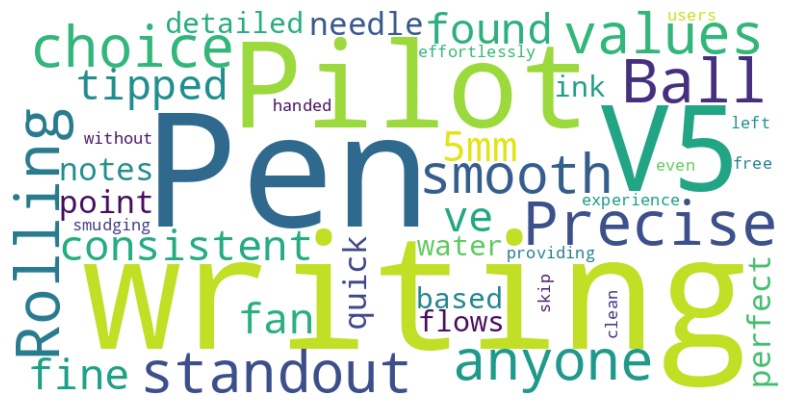

In [10]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

review = "The Pilot V5 Precise Rolling Ball Pen is a standout choice for anyone who values smooth, consistent writing. As a fan of fine-tipped pens, I’ve found the 0.5mm needle-point to be perfect for both quick notes and detailed writing. The water-based ink flows effortlessly, providing a clean, skip-free experience without smudging—even for left-handed users."

# 1. using textblob
blob = TextBlob(review)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

print(f"Polarity: {polarity}")
print(f"Subjectivity: {subjectivity}")

# 1. using vader
vader = SentimentIntensityAnalyzer()
vader_scores = vader.polarity_scores(review)
print(f"VADER Scores: {vader_scores}")

# 2.
compound = vader_scores['compound']
if compound >= 0.05:
    sentiment = "Positive"
elif compound <= -0.05:
    sentiment = "Negative"
else:
    sentiment = "Neutral"
print(f"VADER Sentiment: {sentiment}")

# 3.
positive_reviews = [review] if sentiment == "Positive" else []

if positive_reviews:
    text = " ".join(positive_reviews)
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No positive reviews to display in word cloud.")

Q6. Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starting from any seed word you
provide.

In [ ]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

linus_paragraph = """
    Technology has become an essential part of our daily lives. From smartphones and laptops to smart homes and online services, it has made tasks faster and more convenient. People can now connect with others across the world in seconds, access unlimited information, and even work or study from home. While technology brings many benefits, it also comes with challenges like privacy concerns, cybercrime, and too much screen time. It’s important to use technology wisely and find a balance. As it continues to evolve, it will keep changing how we live, work, and interact with the world around us.
"""

# 1. Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([linus_paragraph])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in linus_paragraph.split('\n'):
    if line.strip():  # Skip empty lines
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(2, len(token_list)+1):
            input_sequences.append(token_list[:i])

# Pad sequences
max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Split predictors and label
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = np.zeros((len(labels), total_words))
for i, label in enumerate(labels):
    ys[i, label] = 1

# 2. Build a simple LSTM model
model = Sequential([
    Embedding(total_words, 10, input_length=max_seq_len-1),
    LSTM(50),
    Dense(total_words, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Train the model
model.fit(xs, ys, epochs=100, verbose=1)  # Reduced epochs for faster testing

# Generate new text
seed_text = "linus"
next_words = 15
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print("\nGenerated text:")
print(seed_text)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.0124 - loss: 4.3697
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0654 - loss: 4.3668
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0841 - loss: 4.3647
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.0684 - loss: 4.3625
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0653 - loss: 4.3610
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0841 - loss: 4.3586
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0559 - loss: 4.3567
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0559 - loss: 4.3554
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0684 - loss: 4.3512
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0684 - loss: 4.3481
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0841 - loss: 4.3427
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0539 - loss: 4.3339
E